In [25]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


from sklearn.metrics import roc_curve, auc,RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import dataframe_image as dfi


In [26]:
df = pd.read_csv("../Dataset/fan_features.csv").iloc[:,1:]
df

,y_min,y_max,y_mean,y_std,zcr_mean,zcr_min,zcr_max,spec_cent_min,spec_cent_mean,spec_roll_min,spec_roll_mean,rms_mean,flat_mean,flat_max,amp_mean,amp_min,melspec_mean,melspec_std,class
0,-0.026549,0.025436,-5.624716e-07,0.005804,0.109654,0.057617,0.153809,1853.320838,2105.182951,4209.741211,4567.637036,0.005728,0.000989,0.011150,0.015913,0.010359,0.007248,0.034759,0
1,-0.024012,0.023735,-4.611875e-06,0.005874,0.075940,0.026855,0.125488,952.508337,1524.399576,2045.654297,3373.768308,0.005831,0.000385,0.001024,0.016215,0.010578,0.007658,0.032697,0
2,-0.027624,0.023215,1.237546e-06,0.006159,0.037438,0.017578,0.096680,809.095334,1081.963248,1539.624023,2367.153513,0.006127,0.000184,0.002413,0.015449,0.009412,0.008834,0.037003,0
3,-0.025296,0.024671,-4.694535e-08,0.005871,0.055022,0.027832,0.073730,1075.988912,1220.102213,1819.555664,2435.300355,0.005838,0.000239,0.004255,0.015978,0.009294,0.008052,0.031213,0
4,-0.029507,0.026129,-4.465954e-06,0.006169,0.051522,0.023926,0.074707,1018.973249,1262.663528,2131.787109,2782.229735,0.006116,0.000300,0.004802,0.016088,0.008529,0.008755,0.035059,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5545,-0.017697,0.021168,2.730560e-07,0.004926,0.047838,0.027832,0.119629,1001.090252,1190.449035,2228.686523,2734.616875,0.004901,0.000267,0.004934,0.012776,0.007137,0.005616,0.022351,1
5546,-0.020151,0.020511,4.749384e-06,0.004993,0.047249,0.021973,0.104492,1023.721270,1182.886307,2271.752930,2699.469292,0.004982,0.000245,0.003081,0.013208,0.007722,0.005799,0.020939,1
5547,-0.021889,0.021135,-2.466638e-07,0.005315,0.049548,0.030273,0.067383,960.878474,1122.202736,1981.054688,2344.920855,0.005291,0.000248,0.005764,0.014087,0.008673,0.006537,0.022093,1
5548,-0.021102,0.020272,1.632402e-06,0.004845,0.069002,0.040527,0.083984,1220.778566,1378.274745,2304.052734,2833.664613,0.004805,0.000373,0.005657,0.013041,0.008418,0.005483,0.022506,1


In [27]:
df.corr()

,y_min,y_max,y_mean,y_std,zcr_mean,zcr_min,zcr_max,spec_cent_min,spec_cent_mean,spec_roll_min,spec_roll_mean,rms_mean,flat_mean,flat_max,amp_mean,amp_min,melspec_mean,melspec_std,class
y_min,1.000000,-0.760774,0.005541,-0.690807,0.086183,0.066016,0.054088,0.071843,0.056111,0.094259,0.073606,-0.682319,0.167315,0.076394,-0.685025,-0.532339,-0.656645,-0.528052,-0.106736
y_max,-0.760774,1.000000,-0.026802,0.572251,-0.027426,-0.008072,-0.002024,-0.035272,-0.014410,-0.055066,-0.029313,0.563586,-0.103509,-0.024777,0.633406,0.483020,0.526345,0.383081,0.051917
y_mean,0.005541,-0.026802,1.000000,-0.030902,0.030700,0.026931,0.020353,0.033198,0.032884,0.030881,0.030706,-0.031006,0.030152,0.026696,-0.018864,0.023893,-0.029315,-0.027280,0.004682
y_std,-0.690807,0.572251,-0.030902,1.000000,-0.347067,-0.285648,-0.362158,-0.227656,-0.269072,-0.242488,-0.277964,0.999582,-0.426846,-0.270530,0.885145,0.716070,0.988361,0.878369,0.158339
zcr_mean,0.086183,-0.027426,0.030700,-0.347067,1.000000,0.906669,0.814481,0.932238,0.960550,0.897631,0.907916,-0.341082,0.944300,0.690913,-0.012928,0.147664,-0.388255,-0.495482,-0.096238
zcr_min,0.066016,-0.008072,0.026931,-0.285648,0.906669,1.000000,0.690873,0.882361,0.867915,0.843831,0.819428,-0.278190,0.844382,0.635537,0.043770,0.200273,-0.327275,-0.457965,-0.089588
zcr_max,0.054088,-0.002024,0.020353,-0.362158,0.814481,0.690873,1.000000,0.684952,0.778183,0.680857,0.744371,-0.361614,0.807083,0.610683,-0.136855,-0.034607,-0.389321,-0.418106,-0.066178
spec_cent_min,0.071843,-0.035272,0.033198,-0.227656,0.932238,0.882361,0.684952,1.000000,0.961621,0.972442,0.934090,-0.218812,0.865590,0.641938,0.100051,0.274181,-0.270846,-0.391866,-0.123280
spec_cent_mean,0.056111,-0.014410,0.032884,-0.269072,0.960550,0.867915,0.778183,0.961621,1.000000,0.949241,0.980516,-0.263530,0.913294,0.673389,0.035677,0.191253,-0.307306,-0.391009,-0.107793
spec_roll_min,0.094259,-0.055066,0.030881,-0.242488,0.897631,0.843831,0.680857,0.972442,0.949241,1.000000,0.955466,-0.233480,0.859488,0.635152,0.077273,0.244296,-0.286232,-0.398743,-0.139238


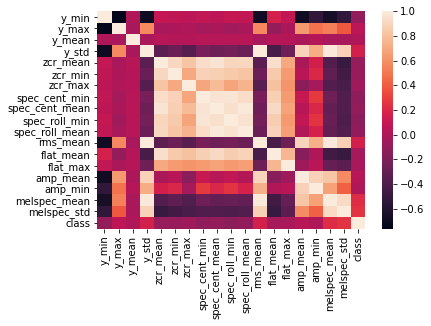

In [28]:
heat_map = sns.heatmap(df.corr())
fig = heat_map.get_figure()
fig.savefig("../img/fan_model/correlation_heatmap.PNG",bbox_inches="tight")

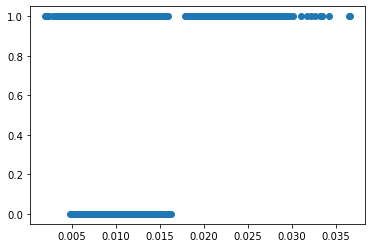

In [29]:
plt.scatter(df["melspec_mean"],df["class"])

In [30]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1])

In [31]:
pipeline_lr = Pipeline([('scalar1',StandardScaler()),
                        ('lr_classifier',LogisticRegression(random_state=0))])

pipeline_rf = Pipeline([('scalar2',StandardScaler()),
                        ('rf_classifier',RandomForestClassifier(n_estimators=int((len(df.columns)**0.5//1)+2), criterion= 'entropy',random_state=0))])

pipeline_dt = Pipeline([('scalar3',StandardScaler()),
                        ('dt_classifier',DecisionTreeClassifier(criterion="entropy",random_state=0))])

pipeline_GaussianNB = Pipeline([('scalar4',StandardScaler()),
                        ('gaussianNB_classifier',GaussianNB())])

pipeline_SVM = Pipeline([('scalar5',StandardScaler()),
                        ('svm_classifier',SVC(kernel="linear",C=1))])


In [32]:
pipelines = [pipeline_lr,pipeline_rf,pipeline_dt,pipeline_GaussianNB,pipeline_SVM]

pipe_dict = {0:'Logistic Regression',1:'Random Forest',2:'Decision Tree',3:'GaussianNB',4:'Support Vector Machine'}

In [33]:
import warnings
warnings.filterwarnings('ignore')

for pipe in pipelines:
    pipe.fit(X_train,y_train)

In [34]:
best_f1=0.0
best_classifier_indx = 0
best_pipeline=""
evaluation_metrics = ["f1","accuracy","precision","recall"]

In [35]:
result = {}
list_of_results = []

In [36]:
for i,model in enumerate(pipelines):
    pred = model.predict(X_test)
    print(f"{pipe_dict[i]}")
    result.update()
    for metric in evaluation_metrics:
        scores = np.round(cross_val_score(model,df.iloc[:,:-1],df.iloc[:,-1], cv=5,scoring=metric),2)
        print(f"{pipe_dict[i]} {metric}: {scores}, mean: {np.mean(scores)}")
        result.update({"model":pipe_dict[i],
                       metric+"scores":scores,
                       metric+"_mean":np.mean(scores)})
        
    
    score = cross_val_score(model,df.iloc[:,:-1],df.iloc[:,-1], cv=5,scoring="f1")
    print(f"mean f1 = {np.mean(score)}, best f1: {best_f1}")
 

    if np.mean(score)>best_f1:

        best_f1 =  np.mean(score)
        best_pipeline=model
        best_classifier_idnx = i
    list_of_results.append(result)
    result = {}

print(f"Classifier with the best accuracy:{pipe_dict[best_classifier_idnx]}")

Logistic Regression
Logistic Regression f1: [0.55 0.28 0.22 0.45 0.52], mean: 0.404
Logistic Regression accuracy: [0.79 0.76 0.76 0.8  0.81], mean: 0.784
Logistic Regression precision: [0.63 0.69 0.8  0.89 0.82], mean: 0.766
Logistic Regression recall: [0.49 0.18 0.13 0.3  0.38], mean: 0.296
mean f1 = 0.4041398910264653, best f1: 0.0
Random Forest
Random Forest f1: [0.69 0.67 0.67 0.71 0.92], mean: 0.732
Random Forest accuracy: [0.84 0.85 0.86 0.88 0.95], mean: 0.876
Random Forest precision: [0.71 0.82 0.93 0.96 0.85], mean: 0.8539999999999999
Random Forest recall: [0.66 0.57 0.52 0.57 1.  ], mean: 0.6639999999999999
mean f1 = 0.7315442890129178, best f1: 0.4041398910264653
Decision Tree
Decision Tree f1: [0.62 0.67 0.73 0.82 0.88], mean: 0.744
Decision Tree accuracy: [0.76 0.83 0.87 0.91 0.93], mean: 0.86
Decision Tree precision: [0.54 0.69 0.8  0.85 0.79], mean: 0.7340000000000001
Decision Tree recall: [0.72 0.64 0.67 0.79 1.  ], mean: 0.764
mean f1 = 0.744150711284628, best f1: 0.73

In [37]:
evaluation_metrics_df = pd.DataFrame(list_of_results)
evaluation_metrics_df


,model,f1scores,f1_mean,accuracyscores,accuracy_mean,precisionscores,precision_mean,recallscores,recall_mean
0,Logistic Regression,"[0.55, 0.28, 0.22, 0.45, 0.52]",0.404,"[0.79, 0.76, 0.76, 0.8, 0.81]",0.784,"[0.63, 0.69, 0.8, 0.89, 0.82]",0.766,"[0.49, 0.18, 0.13, 0.3, 0.38]",0.296
1,Random Forest,"[0.69, 0.67, 0.67, 0.71, 0.92]",0.732,"[0.84, 0.85, 0.86, 0.88, 0.95]",0.876,"[0.71, 0.82, 0.93, 0.96, 0.85]",0.854,"[0.66, 0.57, 0.52, 0.57, 1.0]",0.664
2,Decision Tree,"[0.62, 0.67, 0.73, 0.82, 0.88]",0.744,"[0.76, 0.83, 0.87, 0.91, 0.93]",0.860,"[0.54, 0.69, 0.8, 0.85, 0.79]",0.734,"[0.72, 0.64, 0.67, 0.79, 1.0]",0.764
3,GaussianNB,"[0.48, 0.35, 0.28, 0.55, 0.5]",0.432,"[0.59, 0.75, 0.76, 0.81, 0.47]",0.676,"[0.36, 0.56, 0.68, 0.75, 0.33]",0.536,"[0.71, 0.26, 0.18, 0.43, 1.0]",0.516
4,Support Vector Machine,"[0.55, 0.26, 0.2, 0.48, 0.52]",0.402,"[0.83, 0.77, 0.76, 0.81, 0.82]",0.798,"[0.89, 0.82, 0.94, 0.94, 0.87]",0.892,"[0.4, 0.16, 0.11, 0.32, 0.37]",0.272


In [38]:
dfi.export(evaluation_metrics_df,"../img/fan_model/evaluation_df.PNG")

In [39]:
pred = pipeline_dt.predict(X_test)

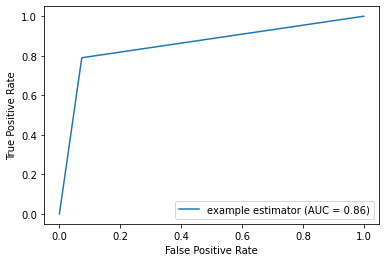

In [40]:

fpr, tpr, thresholds = roc_curve(y_test,pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
        estimator_name='example estimator')

display.plot()
display.figure_.savefig("../img/fan_model/roc_curve.PNG")

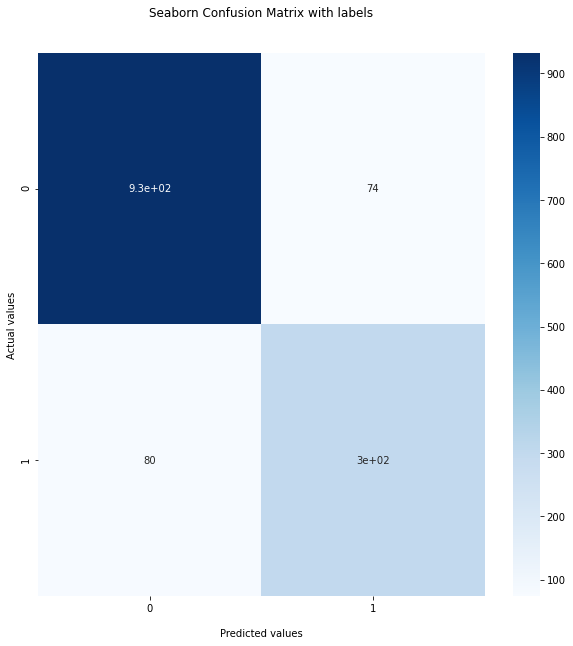

In [41]:

cm = confusion_matrix(y_test,pred)
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted values')
ax.set_ylabel('Actual values');

## Ticket labels - List must be in alphabetical order


## Display the visualization of the Confusion Matrix.
plt.show()
fig.savefig("../img/fan_model/confusion_matrix.PNG", bbox_inches="tight")
